# Car ride-share potential in mid-size U.S. cities from geographic spread

## (notebook 4: clustering)

Fourth notebook for the IBM Data Science Specialization on Coursera, which contains the results from the 19 cities run in the second and third notebooks, and applies clustering to it to find cities of similar type.


In [22]:
# required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    import seaborn as sns
except:
    !conda install -c anaconda seaborn -y
    import seaborn as sns

print(sns)
    
%matplotlib inline

<module 'seaborn' from '/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/__init__.py'>


## Consolidated city results

Copying the results from the 19 cities into one list:

In [3]:
l = []

#                                                      num     ind  mean      std      25th    median   75th     max      iqr       kurt     mad     skew
l.append([ 0, "Arlington, TX",       (4.84, -1.87),    19691,  537, 14.3387,  7.0843,  9.0238, 14.2145, 18.4895, 34.8673,  9.4657, -0.2858,  5.6521,  0.3754])
l.append([ 1, "New Orleans, LA",     (-19.74, -20.39), 29412,  712, 15.4791,  8.5741,  8.9713, 13.2711, 21.8997, 39.3860, 12.9284, -0.6378,  7.2039,  0.5151])
l.append([ 2, "Wichita, KS",         (2.67, 0.32),     16443,  330, 13.6548,  6.6745,  9.3498, 13.3901, 17.7241, 34.9169,  8.3743, -0.2915,  5.2644,  0.2283])
l.append([ 3, "Cleveland, OH",       (-3.04, -4.25),   29795,  923, 17.0707,  8.4256, 10.4362, 16.5191, 22.8600, 38.7520, 12.4237, -0.4959,  6.9080,  0.3652])
l.append([ 4, "Tampa, FL",           (-3.29, 6.03),    27350,  867, 15.1707,  6.5010, 10.5091, 14.7460, 19.3944, 39.0680,  8.8853, -0.0687,  5.1626,  0.3327])
l.append([ 5, "Bakersfield, CA",     (-9.23, 9.29),    13099,  265, 11.3379,  5.7561,  6.7734, 11.3896, 14.9125, 30.2031,  8.1391, -0.3846,  4.6722,  0.3264])
l.append([ 6, "Aurora, CO",          (-46.34, 8.81),   38823, 1319, 15.5712,  8.8961,  8.4923, 14.0925, 22.3417, 46.4409, 13.8494, -0.4944,  7.4455,  0.4949])
l.append([ 7, "Anaheim, CA",         (-8.97, -28.35),  50441, 1366, 18.7794,  7.6983, 12.9883, 17.8040, 23.4351, 43.2360, 10.4467, -0.1643,  6.2545,  0.5582])
l.append([ 8, "Honolulu, HI",        (-8.50, 0.38),    22199,  518, 21.1932, 11.2569, 12.6960, 20.3462, 29.5430, 49.0593, 16.8469, -0.7434,  9.2879,  0.2719])
l.append([ 9, "Santa Ana, CA",       (-7.97, 4.08),    54031, 1271, 20.0972,  9.3565, 12.7733, 18.3937, 27.6653, 47.2550, 14.8920, -0.6433,  7.9070,  0.4425])
l.append([10, "Riverside, CA",       (-3.48, 12.50),   23727,  571, 23.2236,  9.8502, 16.7946, 24.3600, 30.6846, 46.6344, 13.8899, -0.6989,  8.1771, -0.2850])
l.append([11, "Corpus Christi, TX",  (4.72, -3.82),    10409,  157, 13.2069,  8.4404,  6.4260, 11.3794, 18.7835, 42.7136, 12.3575, -0.1420,  6.9449,  0.7373])
l.append([12, "Lexington, KY",       (-4.13, -4.12),   13018,  258, 10.7035,  5.9801,  6.7620,  9.9097, 13.2641, 38.6219,  6.5021,  3.4513,  4.3775,  1.4738])
l.append([13, "Stockton, CA",        (-2.88, 9.47),    10320,  261, 14.7223,  9.6108,  6.4719, 12.8890, 22.8703, 40.4613, 16.3983, -0.8536,  8.2666,  0.4875])
l.append([14, "St. Louis, MO",       (-13.04, -2.29),  33249,  779, 17.2145,  9.5642, 10.0638, 16.0151, 23.0403, 49.0773, 12.9764, -0.0928,  7.7394,  0.5622])
l.append([15, "Saint Paul, MN",      (-18.15, -1.65),  38889, 1388, 14.1652,  5.6409,  9.9856, 14.2069, 18.5735, 30.4644,  8.5878, -0.6202,  4.7007, -0.0357])
l.append([16, "Henderson, NV",       (-34.31, 21.92),  46569, 1246, 17.2175,  9.9413,  9.1680, 15.5206, 25.7430, 42.6078, 16.5749, -0.9627,  8.4417,  0.3339])
l.append([17, "Pittsburgh, PA",      (0.35, -1.04),    28870,  687, 14.6092,  8.7759,  7.4238, 13.3848, 20.9797, 41.0456, 13.5558, -0.4846,  7.3007,  0.5579])
l.append([18, "Cincinnati, OH",      (0.47, 0.28),     25115,  719, 21.3201, 14.1753,  9.7997, 17.7427, 31.5938, 67.4332, 21.7941,  0.1362, 11.8521,  0.8254])

cities_stats_df = pd.DataFrame(l)
cities_stats_df.columns = ["city index", "city name, state", "center coord", "total num venues", "total num indicators", "mean distance to center",
                           "std dev", "25th percentile", "median", "75th percentile", "max distance to center", "interquartile range", "kurtosis",
                           "mean absolute deviation", "skewedness"]



In [4]:
cities_stats_df

,city index,"city name, state",center coord,total num venues,total num indicators,mean distance to center,std dev,25th percentile,median,75th percentile,max distance to center,interquartile range,kurtosis,mean absolute deviation,skewedness
0,0,"Arlington, TX","(4.84, -1.87)",19691,537,14.3387,7.0843,9.0238,14.2145,18.4895,34.8673,9.4657,-0.2858,5.6521,0.3754
1,1,"New Orleans, LA","(-19.74, -20.39)",29412,712,15.4791,8.5741,8.9713,13.2711,21.8997,39.3860,12.9284,-0.6378,7.2039,0.5151
2,2,"Wichita, KS","(2.67, 0.32)",16443,330,13.6548,6.6745,9.3498,13.3901,17.7241,34.9169,8.3743,-0.2915,5.2644,0.2283
3,3,"Cleveland, OH","(-3.04, -4.25)",29795,923,17.0707,8.4256,10.4362,16.5191,22.8600,38.7520,12.4237,-0.4959,6.9080,0.3652
4,4,"Tampa, FL","(-3.29, 6.03)",27350,867,15.1707,6.5010,10.5091,14.7460,19.3944,39.0680,8.8853,-0.0687,5.1626,0.3327
5,5,"Bakersfield, CA","(-9.23, 9.29)",13099,265,11.3379,5.7561,6.7734,11.3896,14.9125,30.2031,8.1391,-0.3846,4.6722,0.3264
6,6,"Aurora, CO","(-46.34, 8.81)",38823,1319,15.5712,8.8961,8.4923,14.0925,22.3417,46.4409,13.8494,-0.4944,7.4455,0.4949
7,7,"Anaheim, CA","(-8.97, -28.35)",50441,1366,18.7794,7.6983,12.9883,17.8040,23.4351,43.2360,10.4467,-0.1643,6.2545,0.5582
8,8,"Honolulu, HI","(-8.5, 0.38)",22199,518,21.1932,11.2569,12.6960,20.3462,29.5430,49.0593,16.8469,-0.7434,9.2879,0.2719
9,9,"Santa Ana, CA","(-7.97, 4.08)",54031,1271,20.0972,9.3565,12.7733,18.3937,27.6653,47.2550,14.8920,-0.6433,7.9070,0.4425


## Visualize the raw data

### Histograms

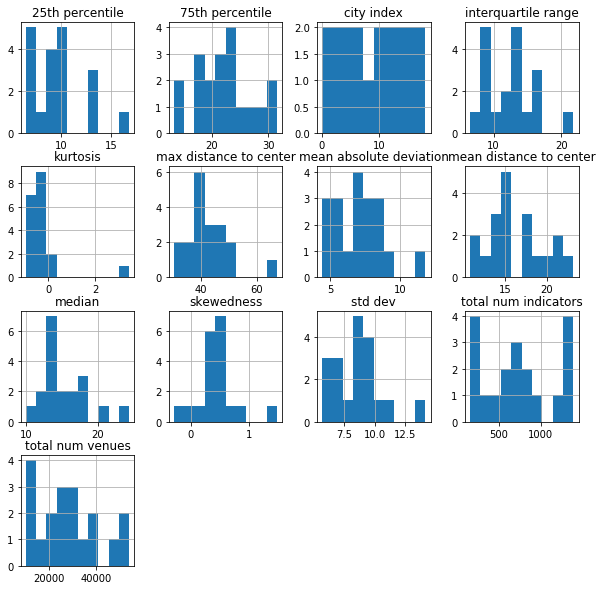

In [27]:
cities_stats_df.hist(figsize=(10,10))
plt.show()

Looks like the data is distributed nicely across the cities. One outlier is in `kurtosis`. It corresponds to Lexington, KY. 

### Correlations

Looking at a correlations heatmap (originally from https://seaborn.pydata.org/examples/many_pairwise_correlations.html )

In [29]:
corr = cities_stats_df.corr()

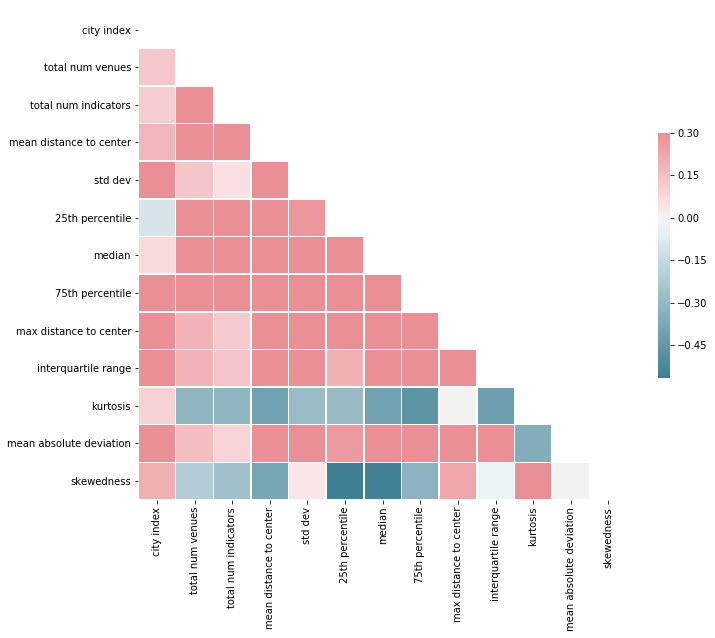

In [30]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
# TODO CONTINUE HERE

## Feature engineering

In order to make the cities comparable, calculate some features. The "city index" column matches the DataFrame index and can be dropped, together with the city name, state, and center coordinates.

The number of indicator venues is normalized by the total number of venues, to give a percentage indication. This will be set aside, to sort the cities once clustering by geographic distribution is done (`cities_ind_df`).

The dataframe for clustering (`cities_geo_df`) will be standardized by dividing the distribution columns by their standard deviation, and centralizing it (subtracting the average). This weighs each column equally when performing k-means clustering.

In [19]:
# percent of indicator venues as compared to total number of venues

cities_ind_df = pd.DataFrame(cities_stats_df['total num indicators'] / cities_stats_df['total num venues'])
cities_ind_df.columns = ['indicator venues percent']

cities_ind_df


,indicator venues percent
0,0.027271
1,0.024208
2,0.020069
3,0.030978
4,0.031700
5,0.020231
6,0.033975
7,0.027081
8,0.023334
9,0.023524


In [20]:

# geographic distribution: pick geo columns
cities_geo_df = cities_stats_df.drop(['city index', 'city name, state', 'center coord', 'total num venues', 'total num indicators'], axis=1, inplace=False)
# divide by standard deviation
cities_geo_df = cities_geo_df / cities_geo_df.std()
# subtract mean
cities_geo_df = cities_geo_df - cities_geo_df.mean()

cities_geo_df

,mean distance to center,std dev,25th percentile,median,75th percentile,max distance to center,interquartile range,kurtosis,mean absolute deviation,skewedness
0,-0.566429,-0.693147,-0.266282,-0.298739,-0.754354,-0.889517,-0.814772,-0.053417,-0.742809,-0.214740
1,-0.231467,0.017715,-0.286020,-0.573350,-0.080160,-0.343103,0.093170,-0.428211,0.094105,0.182378
2,-0.767306,-0.888684,-0.143715,-0.538711,-0.905673,-0.883519,-1.100944,-0.059486,-0.951903,-0.632893
3,0.236024,-0.053142,0.264742,0.372099,0.109691,-0.419768,-0.039165,-0.277122,-0.065479,-0.243735
4,-0.322051,-0.971470,0.292151,-0.144027,-0.575456,-0.381556,-0.966957,0.177741,-1.006806,-0.336121
5,-1.447835,-1.326901,-1.112371,-1.121030,-1.461524,-1.453525,-1.162615,-0.158615,-1.271287,-0.354029
6,-0.204415,0.171358,-0.466111,-0.334252,0.007223,0.509996,0.334662,-0.275525,0.224405,0.124957
7,0.737909,-0.400175,1.224262,0.746116,0.223388,0.122450,-0.557548,0.075951,-0.417924,0.304897
8,1.446899,1.297820,1.114365,1.486116,1.430915,0.826620,1.120626,-0.540649,1.218045,-0.508954
9,1.124978,0.391039,1.143428,0.917770,1.059695,0.608439,0.608039,-0.434067,0.473300,-0.023998
